Adding dataset 1: boston housing dataset


It is True that the data is clean


<Axes: ylabel='Density'>

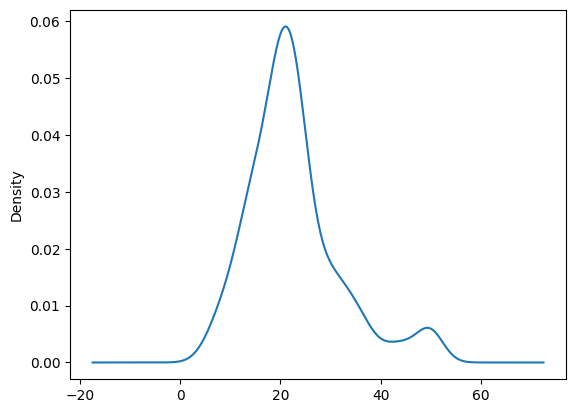

In [ ]:
# Johan Trippitelli - StudentID: 260917958
# Christopher Chong, StudentID: 260976714
# Minh Anh Trinh, StudentID: 260853143


import numpy as np
import pandas as pd
from google.colab import drive
#drive.mount('/content/drive')
df = pd.read_csv('/content/sample_data/boston.csv') # downloaded file from kaggle and use here to upload
df.drop('B', inplace=True, axis=1) # deletes the B column due to ethical problems mentioned

# Data Cleaning
df_cleaned = df.dropna() # Remove rows with missing values
are_equal = df.equals(df_cleaned)
print("It is", are_equal, "that the data is clean") #result is true therefore the original dataset can be used

#####################################
input_x = df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM","AGE","DIS","RAD","TAX","PTRATIO","LSTAT"]]
output_y = df[["MEDV"]]
X_boston = input_x.to_numpy() # could use matrix.transpose() to get all xs is one row if that's what we want
y_boston = output_y.to_numpy()
# use np.array_split(data, k parts) for k fold classification
df['MEDV'].plot(kind='kde') # plots distribution of values from the MEDV column

# New Section

Adding dataset 2: wine dataset

<Axes: ylabel='Frequency'>

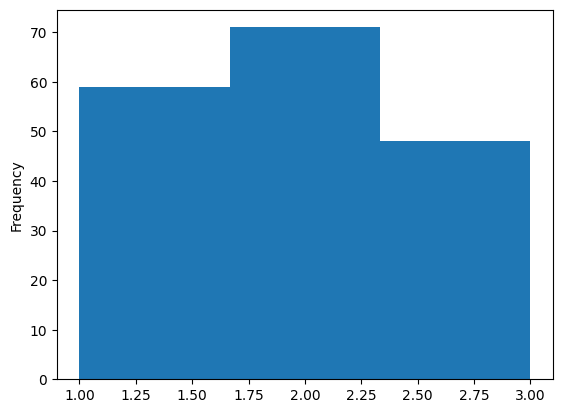

In [ ]:
#Wine dataset is 178 rows and 14 columns each row is a sample and each col an attribute
#Attributes are: Flavanoids, Nonflavanoid_phenols, Proanthocyanins, Color_intensity, Hue, 0D280_0D315_of_diluted_wines, Proline, class(target)
! pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

wine = fetch_ucirepo(id=109)

X_wine = wine.data.features
y_wine = wine.data.targets

#print(y_wine)

import pandas as pd

# Convert the features and labels into a pandas DataFrame
df_wine = pd.DataFrame(data=X_wine, columns=wine.data.feature_names)
df_wine['class'] = y_wine['class']



#cleaning data
# Check for missing values
missing_values = df_wine.isna()

#print(missing_values)
#No missing values => data is clean
#print(df_wine)

input_x = df_wine[["Alcohol", "Malicacid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols","Flavanoids","Nonflavanoid_phenols","Proanthocyanins","Color_intensity","Hue","0D280_0D315_of_diluted_wines", "Proline"]]
output_y = df_wine[["class"]]
X_wine = input_x.to_numpy() # could use matrix.transpose() to get all xs is one row if that's what we want
y_wine = output_y.to_numpy().flatten()


df_wine['class'].plot(kind='hist', bins=3) # plots distribution of values from the class column

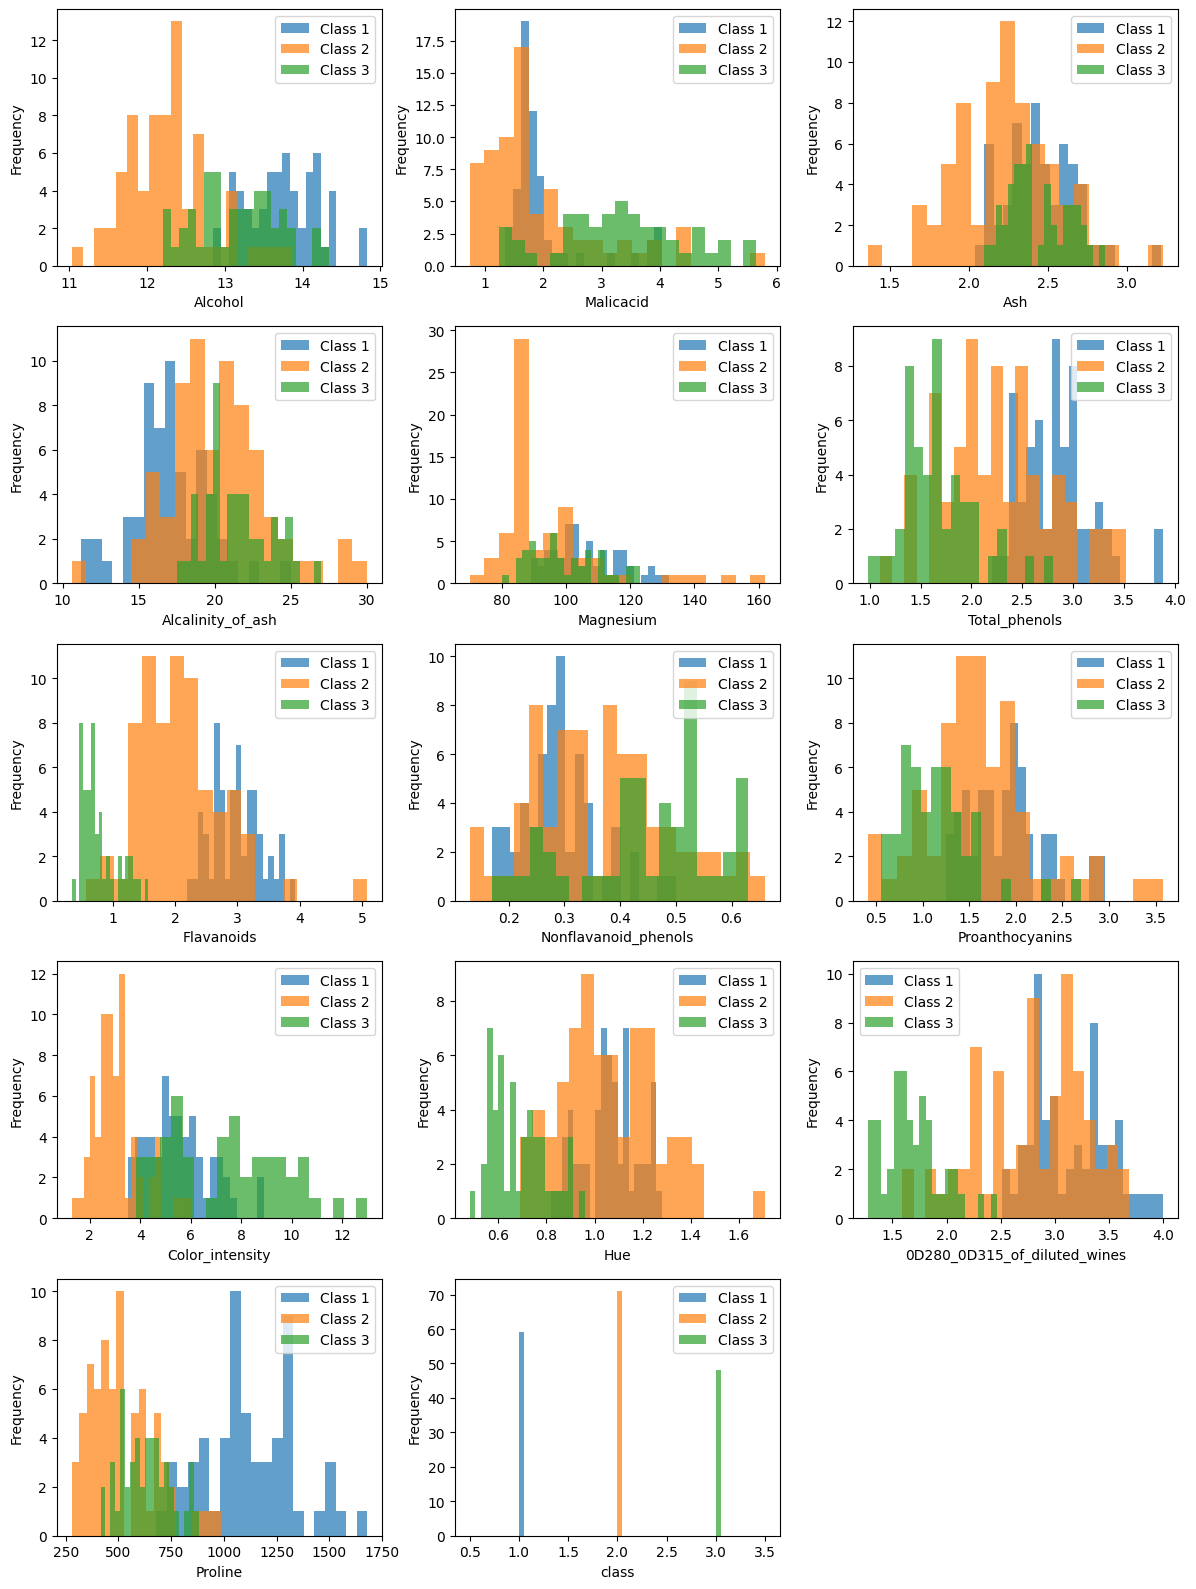

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# List of features (columns) you want to create histograms for
wine_features = wine['data']['features']
features = wine_features.columns.tolist()

# List of unique class labels
class_labels = sorted(df_wine['class'].unique())

num_features = len(features)
num_rows = 5
num_cols = 3  # You want 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 16))

# Flatten the axes array for easier indexing
axes = axes.ravel()

# Iterate through each feature and create histograms
for i, feature in enumerate(features):
    for label in class_labels:
        # Filter data for the current class label
        class_data = df_wine[df_wine['class'] == label]

        # Create a histogram for the current feature within the subplot
        axes[i].hist(class_data[feature], bins=20, alpha=0.7, label=f'Class {label}', color=f'C{label-1}')

    # Add labels and legend to each subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Linear Regression Model


In [ ]:
import math
class LinearRegression:
    def __init__(self, learning_rate = 0.1,epsilon=1e-4, epoch = 10):
      self.learning_rate = learning_rate
      self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
      self.epoch = epoch

    def fit(self, x, y):
      x = np.column_stack([x,np.ones(x.shape[0])])    #add bias by adding a constant feature of value 1
      self.w = np.linalg.inv(x.T @ x) @ x.T @y          #return w using formula for the closed form analytical solution for omega prime
      return self

    def predict(self, x):
      x = np.column_stack([x,np.ones(x.shape[0])])
      yh = x@self.w  #predict the y values
      return yh

In [ ]:
# Cell for testing Linear Regression
model = LinearRegression()
model.fit(X_boston,y_boston)
yh = model.predict(X_boston)

Logistic

In [ ]:
class LogisticRegression:
    def __init__(self, add_bias=True, learning_rate=0.01, epsilon=1e-5, max_iters=1e5):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = int(max_iters)

    def one_hot(self, y):
        return pd.get_dummies(y).values

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Initialize weights and bias (if True)
        self.w = np.random.rand(num_features, num_classes)
        if self.add_bias:
            self.b = np.zeros(num_classes)

        for _ in range(self.max_iters):
            z = np.dot(X, self.w) + self.b
            gradient = -(1/num_samples) * np.dot(X.T, (self.one_hot(y) - self.softmax(z)))
            self.w -= self.learning_rate * gradient

            # Check convergence
            if np.max(np.abs(gradient)) < self.epsilon:
                break
        return self

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        yh = self.softmax(z)
        y_pred = np.argmax(yh, axis=1) + 1
        return y_pred

    def evaluate(self, y_pred, y_true):
        accuracy = np.sum(y_pred == y_true) / len(y_true)
        return accuracy

In [ ]:
! pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
wine = fetch_ucirepo(id=109)
X = wine.data.features.to_numpy()
y = wine.data.targets.to_numpy().flatten()

In [ ]:
def accuracy(true_labels, predicted_labels):
    correct_predictions = np.sum(np.array(true_labels) == np.array(predicted_labels))
    total_predictions = len(true_labels)

    accuracy_score = correct_predictions / total_predictions
    return accuracy_score

def precision(true_labels, predicted_labels, class_label):
    true_positives = np.sum((np.array(true_labels) == class_label) & (np.array(predicted_labels) == class_label))
    false_positives = np.sum((np.array(true_labels) != class_label) & (np.array(predicted_labels) == class_label))

    if true_positives + false_positives == 0:
        return 0  # Handle division by zero

    precision_score = true_positives / (true_positives + false_positives)
    return precision_score

def recall(true_labels, predicted_labels, class_label):
    true_positives = np.sum((np.array(true_labels) == class_label) & (np.array(predicted_labels) == class_label))
    false_negatives = np.sum((np.array(true_labels) == class_label) & (np.array(predicted_labels) != class_label))

    if true_positives + false_negatives == 0:
        return 0  # Handle division by zero

    recall_score = true_positives / (true_positives + false_negatives)
    return recall_score

def f1_score(true_labels, predicted_labels, class_label):
    precision_score = precision(true_labels, predicted_labels, class_label)
    recall_score = recall(true_labels, predicted_labels, class_label)

    if precision_score + recall_score == 0:
        return 0  # Handle division by zero

    f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
    return f1_score

In [ ]:
# Testing Logistic Regression
logistic = LogisticRegression(max_iters=1e-5)
logistic.fit(X_wine, y_wine)
yhat = logistic.predict(X_wine)
print (logistic.max_iters)
print(accuracy(y_wine, yhat))


0
0.398876404494382


In [ ]:
print(X_wine.shape)
print(logistic.w.shape)
yhat = logistic.predict(X_wine)
print(accuracy(y_wine, yhat))
print(f1_score(y_wine, yhat, 3))

(178, 13)
(13, 3)
0.398876404494382
0


In [ ]:
# Mini-Batch SGD
MSE_loss = lambda y, yh: np.mean((y-yh)**2)
class miniBatch:
  def __init__(self, learning_rate=0.00000001, epsilon=1e-5, epoch=1000, model_type=None):
          self.learning_rate = learning_rate
          self.epsilon = epsilon #to get the tolerance for the norm of gradients
          self.epoch = epoch
          self.model_type = model_type
          if self.model_type == "logistic":
            self.logistic = LogisticRegression(max_iters=1) #define a logistic object with 1 iteration to properly perform SGD utilizing the previous code

  def createBatch(self, x, y, batch_size):
    miniBatches = []
    # Shuffle the data to ensure randomness in mini-batches
    combined_data = np.column_stack((x, y))  # Combine x and y horizontally
    np.random.shuffle(combined_data)

    num_samples = combined_data.shape[0]  # Get the total number of samples

    # Create mini-batches
    for i in range(0, num_samples, batch_size):
        batch_x = combined_data[i:i + batch_size, :-1]  # Extract features from the combined data
        batch_y = combined_data[i:i + batch_size, -1]   # Extract target values from the combined data
        miniBatches.append((batch_x, batch_y))  # Append the mini-batch to the list

        #If there are remaining samples, create a mini-batch with the remaining samples WE SHOULD ASK IF THIS IS NECESSARY I DONT KNOW IF IT COULD MESS WITH THE CALCULATIONS
        if num_samples % batch_size != 0:
            remaining_x = combined_data[-(num_samples % batch_size):, :-1]
            remaining_y = combined_data[-(num_samples % batch_size):, -1]
            miniBatches.append((remaining_x, remaining_y))
    return miniBatches


  def fit(self, x, y, batch_size):
    if self.model_type == "logistic":
      num_samples, num_features = x.shape
      num_classes = len(np.unique(y))
      # Initialize weights and bias (if True)
      self.w = np.random.rand(num_features, num_classes)
      self.b = np.zeros(num_classes)

    if self.model_type == "linear":
      x = np.column_stack([x,np.ones(x.shape[0])]) # Adding the Bias Term
      # Initialize weights to random small values
      input_size = x.shape[1]
      self.w = self.initialize_weights(input_size)

    for iteration in range(self.epoch):
      mini_batches = self.createBatch(x, y, batch_size)
      for mini_batch_x, mini_batch_y in mini_batches:
        if self.model_type == "logistic":
          z = np.dot(mini_batch_x, self.w) + self.b
          gradient = -(1/num_samples) * np.dot(mini_batch_x.T, (self.one_hot(mini_batch_y) - self.softmax(z)))
          self.w -= self.learning_rate * gradient

          # Check convergence
          if np.max(np.abs(gradient)) < self.epsilon:
              break
        elif self.model_type == "linear":
          # Calculate Gradient
          gradient = self.Gradient(mini_batch_x, mini_batch_y, self.w)
          delta_w = self.learning_rate * gradient

          #Update weights with GD for each mini batch iteration
          self.w -= delta_w

          # Check convergence
          if np.max(np.abs(gradient)) < self.epsilon:
            break

    return self

  def predict(self, x_test, weights):
    if self.model_type == "logistic":
      z = np.dot(x_test, self.w) + self.b
      yh = self.softmax(z)
      y_pred = np.argmax(yh, axis=1) + 1
      return y_pred
    elif self.model_type == "linear":
      x_test = np.column_stack([x_test,np.ones(x_test.shape[0])])
      yh = x_test@weights #predict the y values
      return yh

  def initialize_weights(self, input_size):
    # Initialize weights with small random values
    w = np.random.randn(input_size) * 0.01  # Random values from a Gaussian distribution
    return w

  def Gradient(self, x, y, w):
    N,D = x.shape
    if self.model_type == "linear":
      yh = np.dot(x, w)
      #calculate the error
      error = yh - y
      gradient =  np.dot(x.T, error)/N
    return gradient

  def one_hot(self, y):
    # Ensure correct encoding
    y_new = np.append(y, [1,2,3])
    one_hot_temp = pd.get_dummies(y_new).values
    one_hot_real = one_hot_temp[:-3]  # Remove the excess values
    return one_hot_real

  def softmax(self, z):
      exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
      return exp_z / np.sum(exp_z, axis=1, keepdims=True)

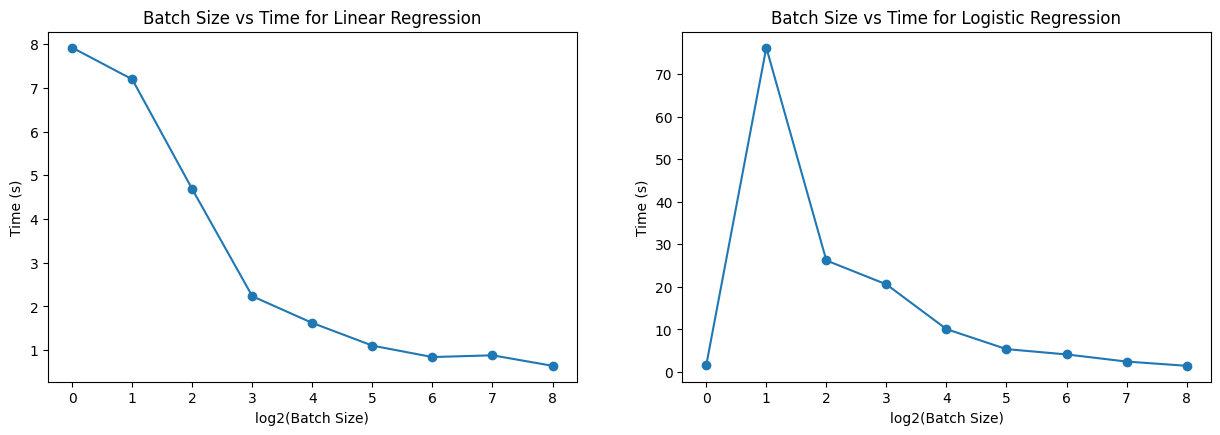

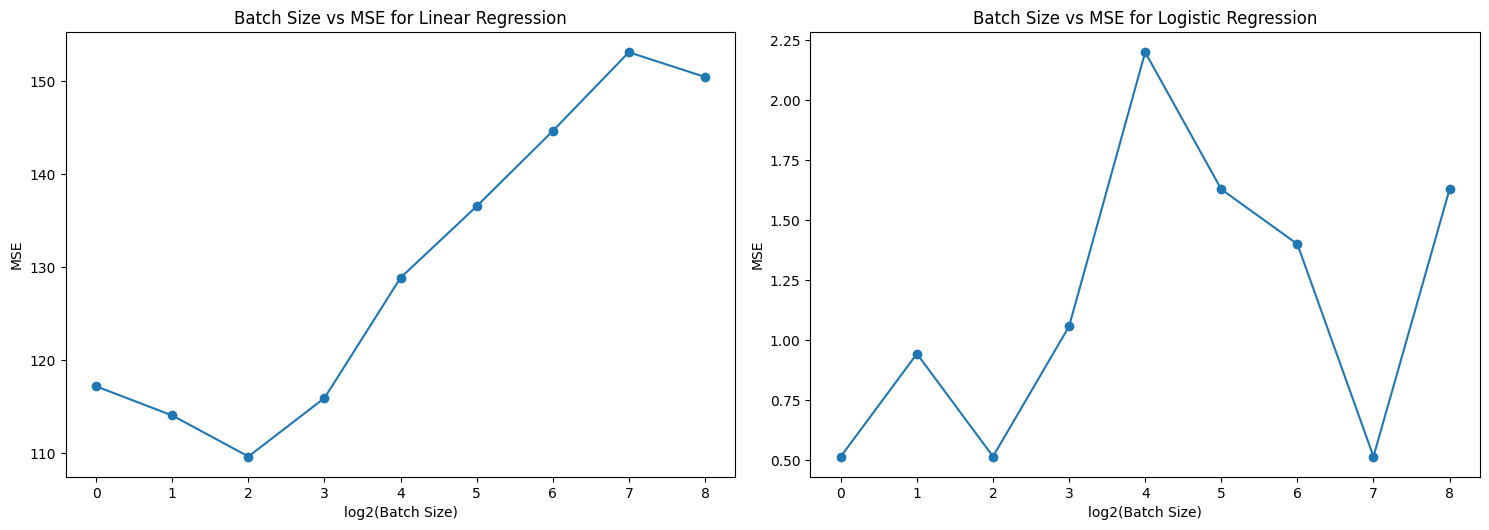

Testing MiniBatch on Linear Regression:
Lowest MSE: 109.64374939977478
Corresponding Batch Size: 4


Fastest convergence time: 0.6429619789123535
Corresponding Batch Size 256


Testing MiniBatch on Logistic Regression
LowestMSE 0.5142857142857142
Corresponding Batch Size 1


Fastest convergence time 1.4427342414855957
Corresponding Batch size 256


In [ ]:
# Part 4 Mini Batch Testing
import time
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
# Split data into 80/20 training and testing
X = wine.data.features.to_numpy()
y = wine.data.targets.to_numpy().flatten()

# Initialize empty lists to store batch sizes, MSE, and time values for Linear Regression
batch_sizes_linear = []
mse_values_linear = []
times_linear = []

# Initialize empty lists to store batch sizes, MSE, and time values for Logistic Regression
batch_sizes_logistic = []
mse_values_logistic = []
times_logistic = []


def train_test_split(x, y, test_size):
    num_instances = x.shape[0]
    n_test = int(num_instances * test_size)
    inds = np.random.permutation(num_instances)
    x_test, y_test = x[inds[:n_test]], y[inds[:n_test]] # takes the test size of the database
    x_train, y_train = x[inds[n_test:]], y[inds[n_test:]] # the rest of data goes to the training set
    return x_train, y_train, x_test, y_test
test_size = .2
X_train_wine, y_train_wine, X_test_wine, y_test_wine = train_test_split(X, y, test_size)
X_train_boston, y_train_boston, X_test_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size)

# Test different sizes of mini batches
linear_model = miniBatch(model_type="linear")
logistic_model = miniBatch(model_type="logistic")
i = 0
best_MSE_linear = 1000
best_batch_size_linear = 0
best_time_linear = 1000
best_MSE_logistic = 1000
best_batch_size_logistic = 0
best_time_logistic = 1000

while i <= 8:
  batch_size = 2**i
  start_time_linear = time.time()
  linear_model.fit(X_train_boston, y_train_boston, batch_size)
  end_time_linear = time.time()
  diff_time_linear = end_time_linear - start_time_linear
  if diff_time_linear < best_time_linear:
    best_time_linear = diff_time_linear
    best_batch_size_time = 2**i
  w = linear_model.w
  yh_linear = linear_model.predict(X_test_boston, weights = w)
  MSE_linear = MSE_loss(y_test_boston, yh_linear)
  if MSE_linear < best_MSE_linear:
    best_MSE_linear = MSE_linear
    best_batch_size_MSE_linear = 2**i

  start_time_logistic = time.time()
  logistic_model.fit(X_train_wine, y_train_wine, batch_size)
  end_time_logistic = time.time()
  diff_time_logistic = end_time_logistic - start_time_logistic
  if diff_time_logistic < best_time_logistic:
    best_time_logistic = diff_time_logistic
    best_batch_size_time_logistic = 2**i
  w = logistic_model.w
  yh_logistic = logistic_model.predict(X_test_wine, weights = w)
  MSE_logistic = MSE_loss(y_test_wine, yh_logistic)
  if MSE_logistic < best_MSE_logistic:
    best_MSE_logistic = MSE_logistic
    best_batch_size_MSE_logistic = 2**i

  # Append batch size, MSE, and time values to the respective lists
  batch_sizes_linear.append(batch_size)
  mse_values_linear.append(MSE_linear)
  times_linear.append(diff_time_linear)
  batch_sizes_logistic.append(batch_size)
  mse_values_logistic.append(MSE_logistic)
  times_logistic.append(diff_time_logistic)
  i+=1

# Create a function to convert x-values to 2^x scaled values
def log2_scale(x):
    return 2**x

# Create subplots for time vs batch size
plt.figure(figsize=(15, 10))

# Plot Batch Size vs Time for Linear Regression with lines
plt.subplot(2, 2, 1)
plt.plot(np.log2(batch_sizes_linear), times_linear, marker='o', linestyle='-')
plt.xlabel('log2(Batch Size)')
plt.ylabel('Time (s)')
plt.title('Batch Size vs Time for Linear Regression')

# Plot Batch Size vs Time for Logistic Regression with lines
plt.subplot(2, 2, 2)
plt.plot(np.log2(batch_sizes_logistic), times_logistic, marker='o', linestyle='-')
plt.xlabel('log2(Batch Size)')
plt.ylabel('Time (s)')
plt.title('Batch Size vs Time for Logistic Regression')

# Create subplots for MSE vs batch size
plt.figure(figsize=(15, 10))

# Plot Batch Size vs MSE for Linear Regression with lines
plt.subplot(2, 2, 3)
plt.plot(np.log2(batch_sizes_linear), mse_values_linear, marker='o', linestyle='-')
plt.xlabel('log2(Batch Size)')
plt.ylabel('MSE')
plt.title('Batch Size vs MSE for Linear Regression')

# Plot Batch Size vs MSE for Logistic Regression with lines
plt.subplot(2, 2, 4)
plt.plot(np.log2(batch_sizes_logistic), mse_values_logistic, marker='o', linestyle='-')
plt.xlabel('log2(Batch Size)')
plt.ylabel('MSE')
plt.title('Batch Size vs MSE for Logistic Regression')

plt.tight_layout()
plt.show()

print("Testing MiniBatch on Linear Regression:")
print("Lowest MSE:", best_MSE_linear)
print("Corresponding Batch Size:", best_batch_size_MSE_linear)
print("\n")
print("Fastest convergence time:", best_time_linear)
print("Corresponding Batch Size", best_batch_size_time)
print("\n")
print("Testing MiniBatch on Logistic Regression")
print("LowestMSE", best_MSE_logistic)
print("Corresponding Batch Size", best_batch_size_MSE_logistic)
print("\n")
print("Fastest convergence time", best_time_logistic)
print("Corresponding Batch size", best_batch_size_time_logistic)



In [ ]:
# Experiment 1 - Linear Regression

np.random.seed(67)


# so first we set aside the 20% test data for the boston dataset
X_train_boston, y_train_boston, X_test_boston, y_test_boston = train_test_split(X_boston, y_boston, 0.2)

# then train linear regression model on the 80% training sets
linear_model = LinearRegression()
linear_model.fit(X_train_boston, y_train_boston)

#then test model on the 20% testing set
y_hat_boston = linear_model.predict (X_test_boston)
y_hat_boston_train = linear_model.predict (X_train_boston)

MSE_loss = lambda y, yh: np.mean((y-yh)**2)

MSE = MSE_loss(y_test_boston, y_hat_boston)
MSE_train = MSE_loss(y_train_boston, y_hat_boston_train)
print("Perforance on Test Set: ")
print("Linear Regression - Mean Square Error: ", MSE )
print()
print("Performance on Training Set")
print("Linear Regression - Mean Square Error: ", MSE_train )

Perforance on Test Set: 
Linear Regression - Mean Square Error:  19.007377839954064

Performance on Training Set
Linear Regression - Mean Square Error:  23.666027022


In [ ]:
# Experiment 1 - Logistic Regression - training the model
np.random.seed(67)

# so first we set aside the 20% test data for wine dataset
X_train_wine, y_train_wine, X_test_wine, y_test_wine = train_test_split(X_wine, y_wine, 0.2)

# then train linear regression model on the 80% training sets
logistic_model = LogisticRegression()
logistic_model.fit(X_train_wine, y_train_wine)

# then we use another code column, because logistic regression takes 30-40 seconds to train every time

In [ ]:
# Experiment 1 - Logistic Regression - evaluating model performance

y_hat_wine = logistic_model.predict(X_test_wine)
y_hat_wine_train = logistic_model.predict(X_train_wine)

wine_accuracy = accuracy(y_hat_wine, y_test_wine)
wine_precision = 0
wine_recall = 0
wine_f1_score = 0

wine_accuracy_train = accuracy(y_hat_wine_train, y_train_wine)
wine_precision_train  = 0
wine_recall_train  = 0
wine_f1_score_train  = 0

for i in [1,2,3]: # loop through each class there is available
  total_in_class = np.sum(y_test_wine == i)
  total = (y_test_wine.shape[0])

  current_ratio = total_in_class / total
  wine_precision += precision(y_test_wine, y_hat_wine, i) * current_ratio # adding up the weighted average by class size for precision
  wine_recall += recall (y_test_wine, y_hat_wine, i) * current_ratio  # adding up the weighted average by class size for recall
  wine_f1_score += f1_score (y_test_wine, y_hat_wine, i ) * current_ratio  # adding up the weighted average by class size for f1 score

  total_in_class_train = np.sum(y_train_wine == i)
  total_train = (y_train_wine.shape[0])

  current_ratio_train = total_in_class_train  / total_train
  wine_precision_train += precision(y_train_wine, y_hat_wine_train, i) * current_ratio_train # adding up the weighted average by class size for precision
  wine_recall_train += recall (y_train_wine, y_hat_wine_train, i) * current_ratio_train  # adding up the weighted average by class size for recall
  wine_f1_score_train += f1_score (y_train_wine, y_hat_wine_train, i ) * current_ratio_train  # adding up the weighted average by class size for f1 score

print("Performance on Testing Set:")
print("Accuracy:", wine_accuracy)
print("Precision:",wine_precision)
print("Recall:",wine_recall)
print("F1-score:",wine_f1_score)
print()
print("Performance on Training Set:")
print("Accuracy:", wine_accuracy_train)
print("Precision:",wine_precision_train)
print("Recall:",wine_recall_train)
print("F1-score:",wine_f1_score_train)

Performance on Testing Set:
Accuracy: 0.9714285714285714
Precision: 0.9736263736263737
Recall: 0.9714285714285714
F1-score: 0.9714708994708996

Performance on Training Set:
Accuracy: 0.9440559440559441
Precision: 0.9447703090560233
Recall: 0.9440559440559441
F1-score: 0.9439642849452976


In [ ]:
# EXPERIMENT 2: Five Fold Cross Validation - Linear Regression

def cross_validate(n, n_folds=5):
    #get the number of data samples in each split

    n_val = n // n_folds
    inds = np.random.permutation(n)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        #get the validation indexes
        val_inds = list(range(f * n_val, (f+1)*n_val))
        #get the train indexes
        if f > 0:
            tr_inds = list(range(f*n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f+1)*n_val, n))
        #The yield statement suspends function’s execution and sends a value back to the caller
        #but retains enough state information to enable function to resume where it is left off
        yield tr_inds, val_inds


In [ ]:
# EXPERIMENT 2: Five Fold Cross Validation - Linear Regression

#np.random.seed(65) # for reproducibility

num_folds = 5
n_dataset_boston = X_boston.shape[0] # here, cross_validate function will give us the proper indexes to use when doing 5 fold cross validation
# so here, we don't use the premade training and test set, here we just have a training set and a validation set.

for fold_number, (train, valid) in enumerate(cross_validate(n_dataset_boston, num_folds)):
    fold_model = LinearRegression() # FOR TASK 3, EXPERIMENT 2, SIMPLY PUT PERFORMANCE METRICS HERE ,
    fold_model = fold_model.fit(X_boston[train], y_boston[train]) # will only train using the 4 folds allocated by the cross_validate function

    y_hat_boston_fold = fold_model.predict(X_boston[valid])
    y_hat_boston_fold_train = fold_model.predict(X_boston[train])

    MSE_fold = MSE_loss(y_boston[valid], y_hat_boston_fold)
    MSE_fold_train = MSE_loss(y_boston[train], y_hat_boston_fold_train)


    print("Testing Set: validated using Fold",fold_number + 1, ": ", MSE_fold )
    print("Training Set: validated using Fold",fold_number + 1, ": ", MSE_fold_train )
    print()



Testing Set: validated using Fold 1 :  12.648895273886541
Training Set: validated using Fold 1 :  25.179937520500303

Testing Set: validated using Fold 2 :  26.201555743989637
Training Set: validated using Fold 2 :  22.697768769047922

Testing Set: validated using Fold 3 :  35.12882654924537
Training Set: validated using Fold 3 :  21.561131941500754

Testing Set: validated using Fold 4 :  77.09985345257094
Training Set: validated using Fold 4 :  14.152057056423034

Testing Set: validated using Fold 5 :  29.833469495109576
Training Set: validated using Fold 5 :  22.78359745817192



In [ ]:
# EXPERIMENT 2: Five Fold Cross Validation - Logistic Regression

num_folds = 5

n_dataset_wine = X_wine.shape[0]

for fold_number, (train, valid) in enumerate(cross_validate(n_dataset_wine, num_folds)):
    fold_model = LogisticRegression() # FOR TASK 3, EXPERIMENT 2, SIMPLY PUT PERFORMANCE METRICS HERE ,
    fold_model.fit(X_wine[train], y_wine[train]) # will only train using the 4 folds allocated by the cross_validate function
    #logistic_model = LogisticRegression()
    #logistic_model.fit(X_train_wine, y_train_wine)

    y_hat_wine_fold = fold_model.predict(X_wine[valid])
    y_hat_wine_fold_train = fold_model.predict(X_wine[train])

    y_test_wine = y_wine[valid]
    y_train_wine = y_wine[train]

    wine_precision = 0
    wine_recall = 0
    wine_f1_score = 0

    wine_precision_train = 0
    wine_recall_train = 0
    wine_f1_score_train = 0

    wine_accuracy = accuracy(y_hat_wine_fold, y_test_wine)
    wine_accuracy_train = accuracy(y_hat_wine_fold_train, y_train_wine)

    for i in [1,2,3]: # loop through each class there is available
      total_in_class = np.sum(y_test_wine == i)
      total = (y_test_wine.shape[0])

      current_ratio = total_in_class / total
      wine_precision += precision(y_test_wine, y_hat_wine_fold, i) * current_ratio # adding up the weighted average by class size for precision
      wine_recall += recall (y_test_wine, y_hat_wine_fold, i) * current_ratio  # adding up the weighted average by class size for recall
      wine_f1_score += f1_score (y_test_wine, y_hat_wine_fold, i ) * current_ratio  # adding up the weighted average by class size for f1 score


      total_in_class_train = np.sum(y_train_wine == i)
      total_train = (y_train_wine.shape[0])

      current_ratio_train = total_in_class_train / total_train
      wine_precision_train += precision(y_train_wine, y_hat_wine_fold_train, i) * current_ratio # adding up the weighted average by class size for precision
      wine_recall_train += recall (y_train_wine, y_hat_wine_fold_train, i) * current_ratio  # adding up the weighted average by class size for recall
      wine_f1_score_train += f1_score (y_train_wine, y_hat_wine_fold_train, i ) * current_ratio  # adding up the weighted average by class size for f1 score



    print("On Testing Set")
    print("Validated using Fold",fold_number + 1, ": ")
    print("Accuracy:", wine_accuracy)
    print("Precision:",wine_precision)
    print("Recall:",wine_recall)
    print("F1-score:",wine_f1_score)
    print()
    print("On Training Set")
    print("Validated using Fold",fold_number + 1, ": ")
    print("Accuracy:", wine_accuracy_train)
    print("Precision:",wine_precision_train)
    print("Recall:",wine_recall_train)
    print("F1-score:",wine_f1_score_train)
    print()

On Testing Set
Validated using Fold 1 : 
Accuracy: 0.9142857142857143
Precision: 1.0
Recall: 0.9142857142857143
F1-score: 0.955223880597015

On Training Set
Validated using Fold 1 : 
Accuracy: 0.972027972027972
Precision: 1.0
Recall: 0.9583333333333334
F1-score: 0.9787234042553191

On Testing Set
Validated using Fold 2 : 
Accuracy: 0.8857142857142857
Precision: 0.9274725274725275
Recall: 0.8857142857142857
F1-score: 0.9019047619047619

On Training Set
Validated using Fold 2 : 
Accuracy: 0.9370629370629371
Precision: 0.9590062111801242
Recall: 0.8824489795918368
F1-score: 0.9137873754152823

On Testing Set
Validated using Fold 3 : 
Accuracy: 0.9142857142857143
Precision: 1.0
Recall: 0.9142857142857143
F1-score: 0.955223880597015

On Training Set
Validated using Fold 3 : 
Accuracy: 0.951048951048951
Precision: 0.8372093023255814
Recall: 1.0
F1-score: 0.9113924050632911

On Testing Set
Validated using Fold 4 : 
Accuracy: 0.8857142857142857
Precision: 0.8975155279503106
Recall: 0.885714285

Linear Regression - Performance on Test Set and Training Set
MSE on test set: [40.044219935903065, 47.202292694975164, 35.19518269151517, 37.10557248622169, 34.12389600373858, 33.558949245297, 31.979393092591547]
MSE on training set: [24.133858306895945, 22.77638116065312, 21.085103421847265, 21.112484165783503, 20.553931910077036, 20.602441978406905, 20.446964745168163]


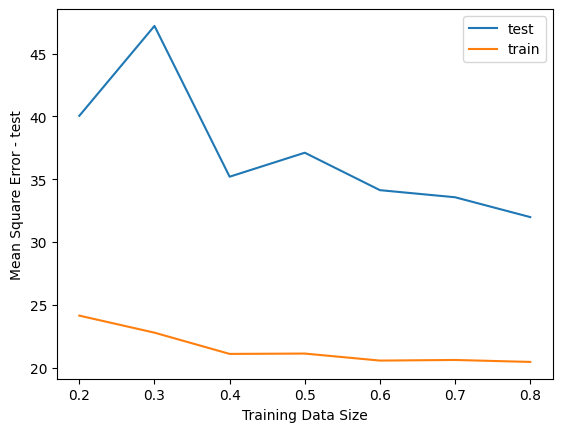

In [ ]:
# EXPERIMENT #3 - Linear Regression - MSE - test set

# RANDOM SEED FOR ALL OF EXPERIMENT 3
np.random.seed(65) # for reproducibility


X_train_boston, y_train_boston, X_test_boston, y_test_boston = train_test_split(X_boston, y_boston, 0.2)


test_sizes = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2 ]
training_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]


boston_performance_MSE_test = []
boston_performance_MSE_train = []


print("Linear Regression - Performance on Test Set and Training Set")



for size in training_sizes:

    X_test_boston_subset, y_test_boston_subset, X_train_boston_subset, y_train_boston_subset  = train_test_split(X_train_boston, y_train_boston, size) # here the train boston subset will have the 20% size in beginning
    # so we have to fit it using train boston, then predict using test boston subset
    linear_model = LinearRegression()
    linear_model.fit(X_train_boston_subset, y_train_boston_subset)

    y_hat_test_boston = linear_model.predict(X_test_boston)
    y_hat_train_boston = linear_model.predict(X_train_boston)

    boston_performance_MSE_test.append( MSE_loss(y_test_boston, y_hat_test_boston) )
    boston_performance_MSE_train.append( MSE_loss(y_train_boston, y_hat_train_boston) )


print("MSE on test set:", boston_performance_MSE_test)
print("MSE on training set:", boston_performance_MSE_train)


plt.plot(training_sizes, boston_performance_MSE_test, label = "test")
plt.plot(training_sizes, boston_performance_MSE_train, label = "train")
plt.xlabel("Training Data Size")
plt.ylabel("Mean Square Error - test")
plt.legend()
plt.show()

Logistic Regression - Performance on Test Set
Training size: 0.2
Accuracy: 0.8857142857142857
Precision: 0.8889717425431711
Recall: 0.8857142857142857
F1-score: 0.884172335600907

Training size: 0.3
Accuracy: 0.8857142857142857
Precision: 0.8927472527472526
Recall: 0.8857142857142857
F1-score: 0.8857142857142857

Training size: 0.4
Accuracy: 0.9142857142857143
Precision: 0.9163265306122448
Recall: 0.9142857142857144
F1-score: 0.9143951833607007

Training size: 0.5
Accuracy: 0.9142857142857143
Precision: 0.9163265306122448
Recall: 0.9142857142857144
F1-score: 0.9143951833607007

Training size: 0.6
Accuracy: 0.8285714285714286
Precision: 0.8681605975723622
Recall: 0.8285714285714285
F1-score: 0.8183333333333332

Training size: 0.7
Accuracy: 0.9428571428571428
Precision: 0.9495798319327731
Recall: 0.9428571428571428
F1-score: 0.9422619047619047

Training size: 0.8
Accuracy: 0.8571428571428571
Precision: 0.8968253968253967
Recall: 0.8571428571428572
F1-score: 0.8543778801843318



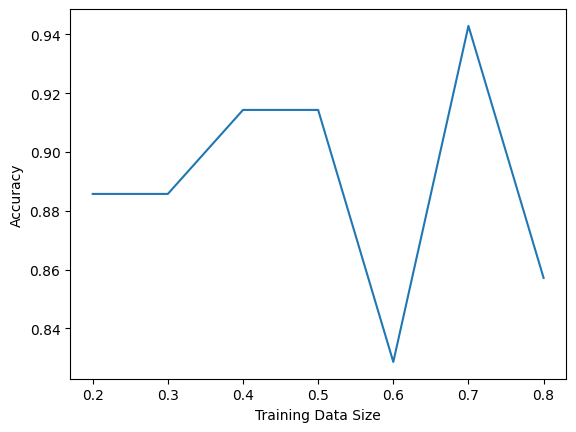

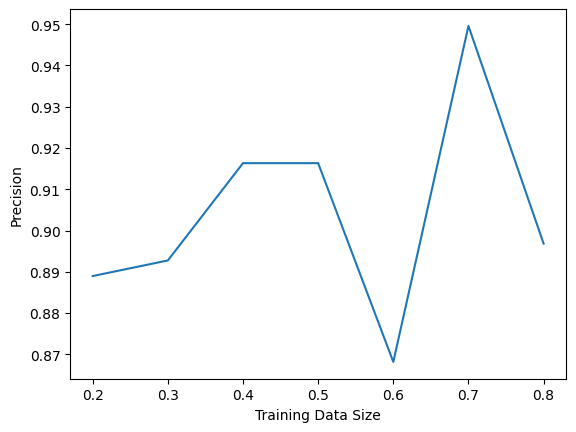

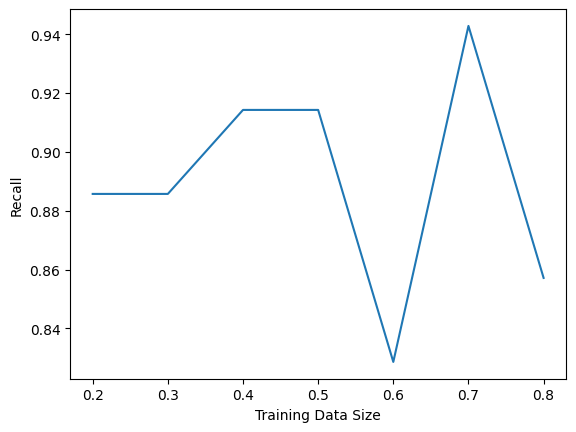

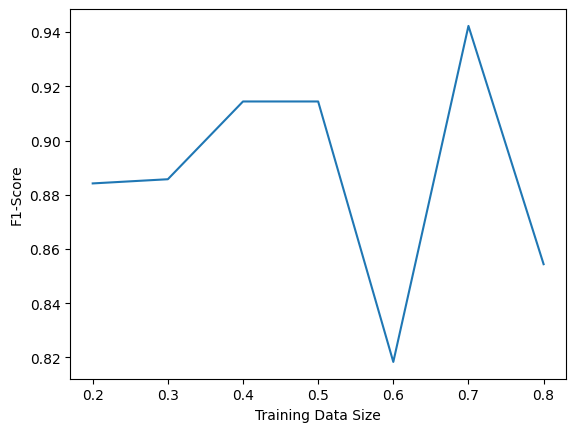

In [ ]:
# EXPERIMENT #3 - Logistic Regression - test set

test_sizes = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2 ]
training_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]


wine_accuracy_performance_test = []
wine_precision_performance_test = []
wine_recall_performance_test = []
wine_f1_score_performance_test = []


print("Logistic Regression - Performance on Test Set")

np.random.seed(44) # for reproducibility

X_train_wine, y_train_wine, X_test_wine, y_test_wine = train_test_split(X_wine, y_wine, 0.2)


for size in training_sizes:
    np.random.seed(44) # for reproducibility

    X_test_wine_subset, y_test_wine_subset, X_train_wine_subset, y_train_wine_subset  = train_test_split(X_train_wine, y_train_wine, size)
    logistic_model = LogisticRegression() # FOR TASK 3, EXPERIMENT 2, SIMPLY PUT PERFORMANCE METRICS HERE ,
    logistic_model.fit(X_train_wine_subset, y_train_wine_subset) # will only train using the 4 folds allocated by the cross_validate function


    y_hat_wine = logistic_model.predict(X_test_wine) # uses original test data
    wine_accuracy = logistic_model.evaluate(y_hat_wine, y_test_wine)

    wine_precision = 0
    wine_recall = 0
    wine_f1_score = 0

    for i in [1,2,3]: # loop through each class there is available
      total_in_class = np.sum(y_test_wine == i)
      total = (y_test_wine.shape[0])

      current_ratio = total_in_class / total
      wine_precision += precision(y_test_wine, y_hat_wine, i) * current_ratio # adding up the weighted average by class size for precision
      wine_recall += recall (y_test_wine, y_hat_wine, i) * current_ratio  # adding up the weighted average by class size for recall
      wine_f1_score += f1_score (y_test_wine, y_hat_wine, i ) * current_ratio  # adding up the weighted average by class size for f1 score

    print("Training size:", size)
    print("Accuracy:", wine_accuracy)
    print("Precision:",wine_precision)
    print("Recall:",wine_recall)
    print("F1-score:",wine_f1_score)
    print()

    wine_accuracy_performance_test.append(wine_accuracy)
    wine_precision_performance_test.append(wine_precision)
    wine_recall_performance_test.append(wine_recall)
    wine_f1_score_performance_test.append(wine_f1_score)


plt.plot(training_sizes, wine_accuracy_performance_test)
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy")
plt.show()

plt.plot(training_sizes, wine_precision_performance_test)
plt.xlabel("Training Data Size")
plt.ylabel("Precision")
plt.show()



plt.plot(training_sizes, wine_recall_performance_test)
plt.xlabel("Training Data Size")
plt.ylabel("Recall")
plt.show()

plt.plot(training_sizes, wine_f1_score_performance_test)
plt.xlabel("Training Data Size")
plt.ylabel("F1-Score")
plt.show()



In [ ]:
# EXPERIMENT #3 - Logistic Regression - training set

test_sizes = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2 ]
training_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

wine_accuracy_performance_train = []
wine_precision_performance_train = []
wine_recall_performance_train = []
wine_f1_score_performance_train = []

np.random.seed(44) # for reproducibility

X_train_wine, y_train_wine, X_test_wine, y_test_wine = train_test_split(X_wine, y_wine, 0.2)


print("Logistic Regression - Performance on Train Set")


for size in training_sizes:
    np.random.seed(44) # for reproducibility

    X_test_wine_subset, y_test_wine_subset, X_train_wine_subset, y_train_wine_subset  = train_test_split(X_train_wine, y_train_wine, size)
    logistic_model = LogisticRegression() # FOR TASK 3, EXPERIMENT 2, SIMPLY PUT PERFORMANCE METRICS HERE ,
    logistic_model.fit(X_train_wine_subset, y_train_wine_subset) # will only train using the 4 folds allocated by the cross_validate function


    y_hat_wine = logistic_model.predict(X_train_wine) # x test wine subset is part of the original training subset
    wine_accuracy = logistic_model.evaluate(y_hat_wine, y_train_wine)

    wine_precision = 0
    wine_recall = 0
    wine_f1_score = 0

    for i in [1,2,3]: # loop through each class there is available
      total_in_class = np.sum(y_train_wine == i)
      total = (y_train_wine.shape[0])

      current_ratio = total_in_class / total
      wine_precision += precision(y_train_wine, y_hat_wine, i) * current_ratio # adding up the weighted average by class size for precision
      wine_recall += recall (y_train_wine, y_hat_wine, i) * current_ratio  # adding up the weighted average by class size for recall
      wine_f1_score += f1_score (y_train_wine, y_hat_wine, i ) * current_ratio  # adding up the weighted average by class size for f1 score

    print("Training size:", size)
    print("Accuracy:", wine_accuracy)
    print("Precision:",wine_precision)
    print("Recall:",wine_recall)
    print("F1-score:",wine_f1_score)
    print()

    wine_accuracy_performance_train.append(wine_accuracy)
    wine_precision_performance_train.append(wine_precision)
    wine_recall_performance_train.append(wine_recall)
    wine_f1_score_performance_train.append(wine_f1_score)



Logistic Regression - Performance on Train Set
Training size: 0.2
Accuracy: 0.9230769230769231
Precision: 0.926754947180479
Recall: 0.9230769230769231
F1-score: 0.9225281579483979

Training size: 0.3
Accuracy: 0.9440559440559441
Precision: 0.9448568467687646
Recall: 0.9440559440559442
F1-score: 0.9435781450961718

Training size: 0.4
Accuracy: 0.9440559440559441
Precision: 0.9462174189446917
Recall: 0.9440559440559441
F1-score: 0.944379471103609

Training size: 0.5
Accuracy: 0.951048951048951
Precision: 0.9510005146368782
Recall: 0.951048951048951
F1-score: 0.9509548304729027

Training size: 0.6
Accuracy: 0.9300699300699301
Precision: 0.9319627126120633
Recall: 0.93006993006993
F1-score: 0.9292339064638848

Training size: 0.7
Accuracy: 0.9300699300699301
Precision: 0.9377622377622378
Recall: 0.93006993006993
F1-score: 0.930255800844036

Training size: 0.8
Accuracy: 0.9230769230769231
Precision: 0.9288164223813681
Recall: 0.9230769230769231
F1-score: 0.9217989972823946



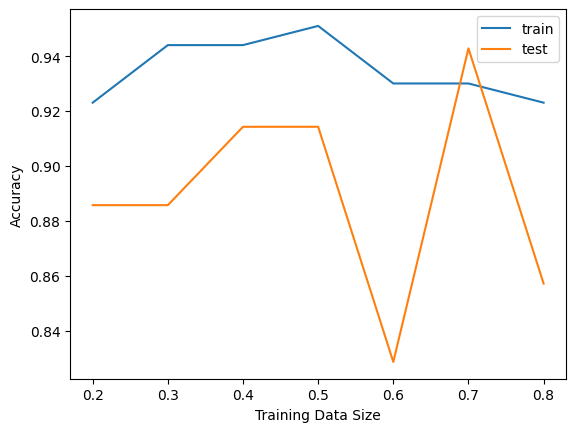

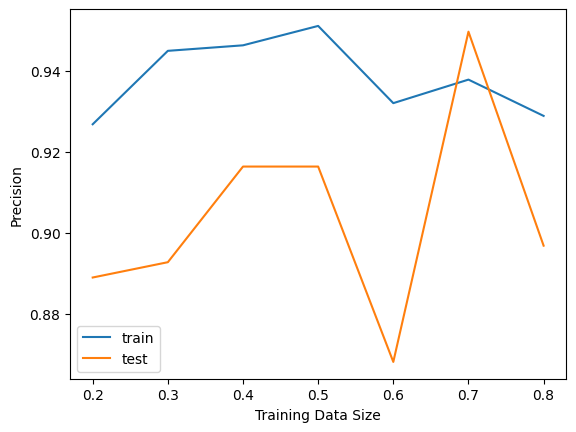

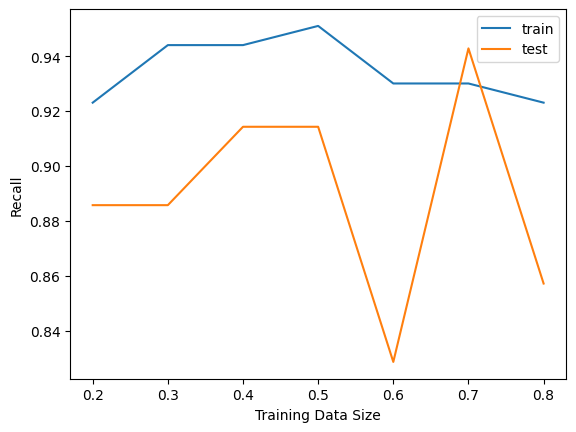

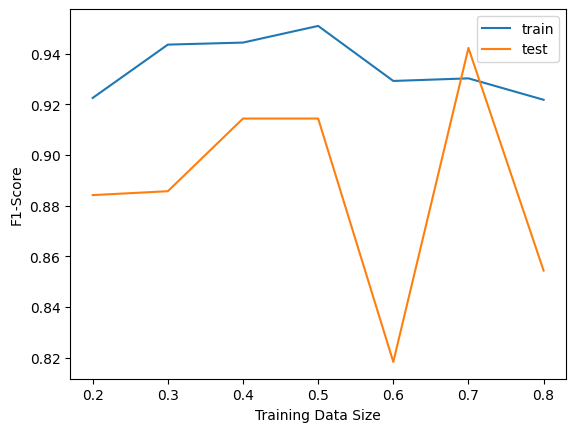

In [ ]:
# Experiment 3 - Training and Testing Graphs for Logistic Regression:

plt.plot(training_sizes, wine_accuracy_performance_train, label = "train")
plt.plot(training_sizes, wine_accuracy_performance_test, label = "test")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(training_sizes, wine_precision_performance_train, label = "train")
plt.plot(training_sizes, wine_precision_performance_test, label = "test")
plt.xlabel("Training Data Size")
plt.ylabel("Precision")
plt.legend()
plt.show()



plt.plot(training_sizes, wine_recall_performance_train, label = "train")
plt.plot(training_sizes, wine_recall_performance_test, label = "test")
plt.xlabel("Training Data Size")
plt.ylabel("Recall")
plt.legend()
plt.show()

plt.plot(training_sizes, wine_f1_score_performance_train, label = "train")
plt.plot(training_sizes, wine_f1_score_performance_test, label = "test")
plt.xlabel("Training Data Size")
plt.ylabel("F1-Score")
plt.legend()
plt.show()

MSE on training data: 60.326050354078326


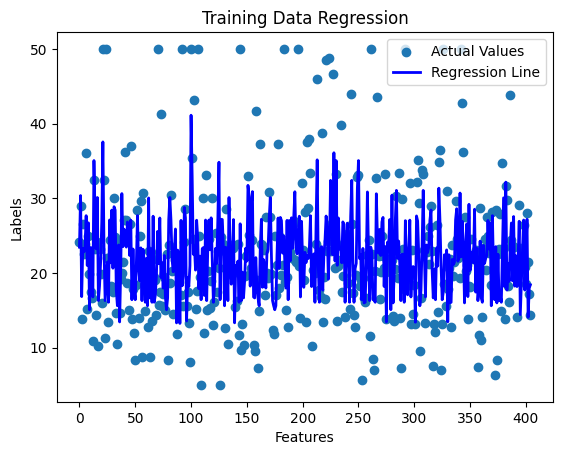

MSE on testing data: 64.01298458911582


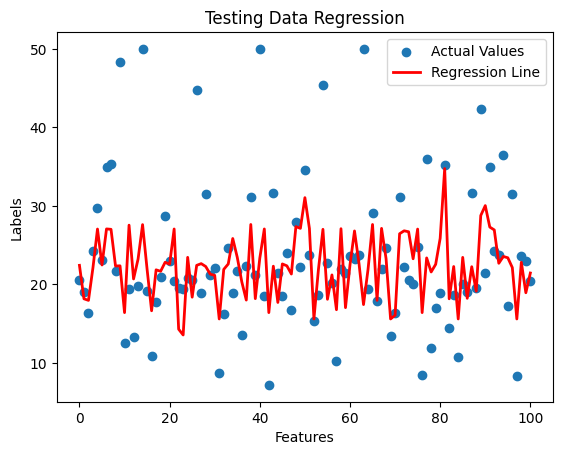

In [ ]:
import matplotlib.pyplot as plt
# Define the Gaussian Basis function
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

X_train_boston, y_train_boston, x_test_boston, y_test_boston = train_test_split(X_boston, y_boston, .2)

# Number of basis functions (µj values) you want to select
num_bases = 5
s = 1.0

# Generate random indices to select µj values from the training set
random_indices = np.random.choice(X_train_boston.shape[0], num_bases, replace=False)
mu_vector = X_train_boston[random_indices, 3]

# Initialize an empty matrix for our training data
num_train_data = X_train_boston.shape[0]
num_centers = len(mu_vector)
Phi = np.zeros((num_train_data, num_centers))
Phi = np.column_stack([Phi,np.ones(Phi.shape[0])])

# Iterate through each data point and each center to compute basis functions
for i in range(num_train_data):
    for j in range(num_centers):
        Phi[i, j] = gaussian_basis(X_train_boston[i, j], mu_vector[j], s)

W = np.linalg.inv((Phi.T@Phi))@np.dot(Phi.T, y_train_boston)

# Initialize an empty matrix for our test data
num_test_data = x_test_boston.shape[0]
Phi_test = np.zeros((num_test_data, num_centers))

# Iterate through each data point and each center to compute basis functions
for i in range(num_test_data):
    for j in range(num_centers):
        Phi_test[i, j] = gaussian_basis(x_test_boston[i, j], mu_vector[j], s)

yh = Phi @ W
Phi_test = np.column_stack([Phi_test,np.ones(Phi_test.shape[0])])
yh_test = Phi_test @ W

MSE = MSE_loss(yh, y_train_boston)
print("MSE on training data:", MSE)

plt.scatter(range(len(y_train_boston)), y_train_boston, label="Actual Values", marker='o')
plt.plot(range(len(y_train_boston)), yh, color='blue', linewidth=2, label="Regression Line")

plt.xlabel("Features")
plt.ylabel("Labels")
plt.title("Training Data Regression")
plt.legend()
plt.show()

MSE = MSE_loss(yh_test, y_test_boston)
print("MSE on testing data:", MSE)
plt.scatter(range(len(y_test_boston)), y_test_boston, label="Actual Values", marker='o')
plt.plot(range(len(y_test_boston)), yh_test, color='red', linewidth=2, label="Regression Line")

plt.xlabel("Features")
plt.ylabel("Labels")
plt.title("Testing Data Regression")
plt.legend()
plt.show()

In [ ]:
# Experiment 5 - Learning Rates - Linear

In [ ]:
X_boston_train, y_boston_train, X_boston_test, y_boston_test = train_test_split(X_boston, y_boston, 0.2)

1e-12
519.4916415396607
1e-10
170.05976502340607
1e-08
122.87311378705765
1e-06
162.2923377025983


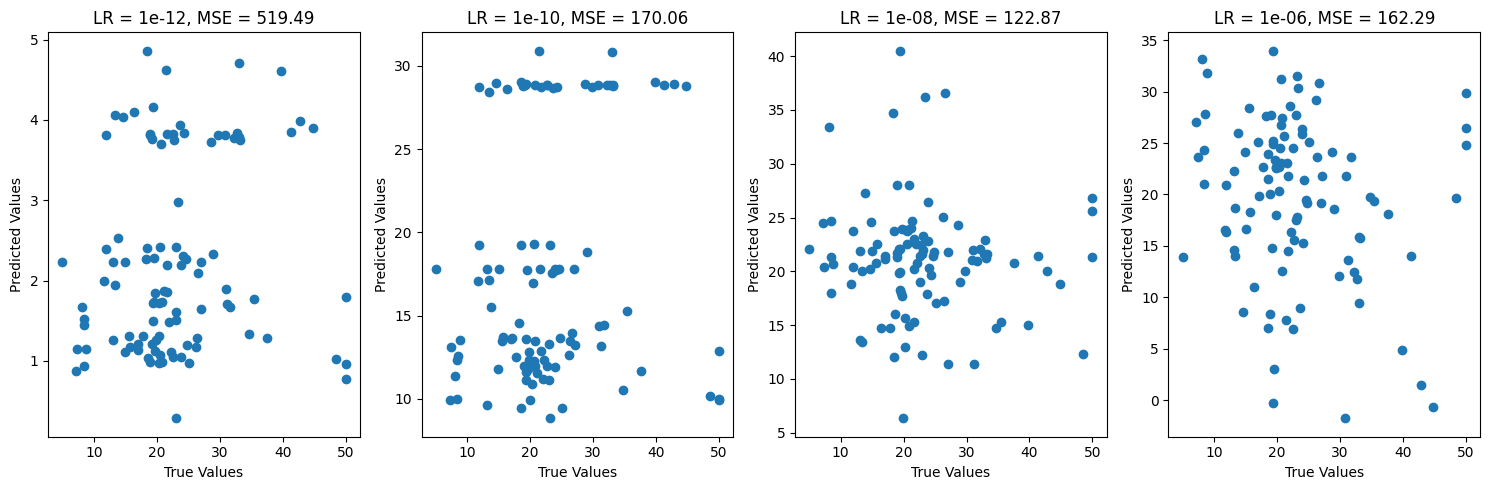

In [ ]:
learning_rates = [1e-12, 1e-10, 1e-8, 1e-6]
fig, axs = plt.subplots(1, len(learning_rates), figsize=(15, 5))
for i, lr in enumerate(learning_rates):
    # Create a LinearRegression model with the current learning rate
    print(lr)
    linear_model = miniBatch(learning_rate=lr, model_type="linear")
    linear_model.fit(X_train_boston, y_train_boston, 1)
    yh_linear = linear_model.predict(X_test_boston, weights = linear_model.w)

    # Calculate the mean squared error
    mse = np.mean((yh_linear - y_boston_test) ** 2)
    print(mse)
    # Plot the data and regression line
    axs[i].scatter(y_boston_test, yh_linear)
    axs[i].set_xlabel('True Values')
    axs[i].set_ylabel('Predicted Values')
    axs[i].set_title(f'LR = {lr}, MSE = {mse:.2f}')

plt.tight_layout()
plt.show()

In [ ]:
# Experiment 5 - Learning Rates - Logistic

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.2)

Learning rate 1e-05
Accuracy:  0.9428571428571428
Precision:  0.9457142857142856
Recall:  0.9428571428571428
F1 Score:  0.9428571428571428
Learning rate 0.001
Accuracy:  0.9428571428571428
Precision:  0.9532467532467532
Recall:  0.9428571428571428
F1 Score:  0.9438095238095238
Learning rate 0.05
Accuracy:  0.9142857142857143
Precision:  0.9357142857142857
Recall:  0.9142857142857143
F1 Score:  0.9159746657283603


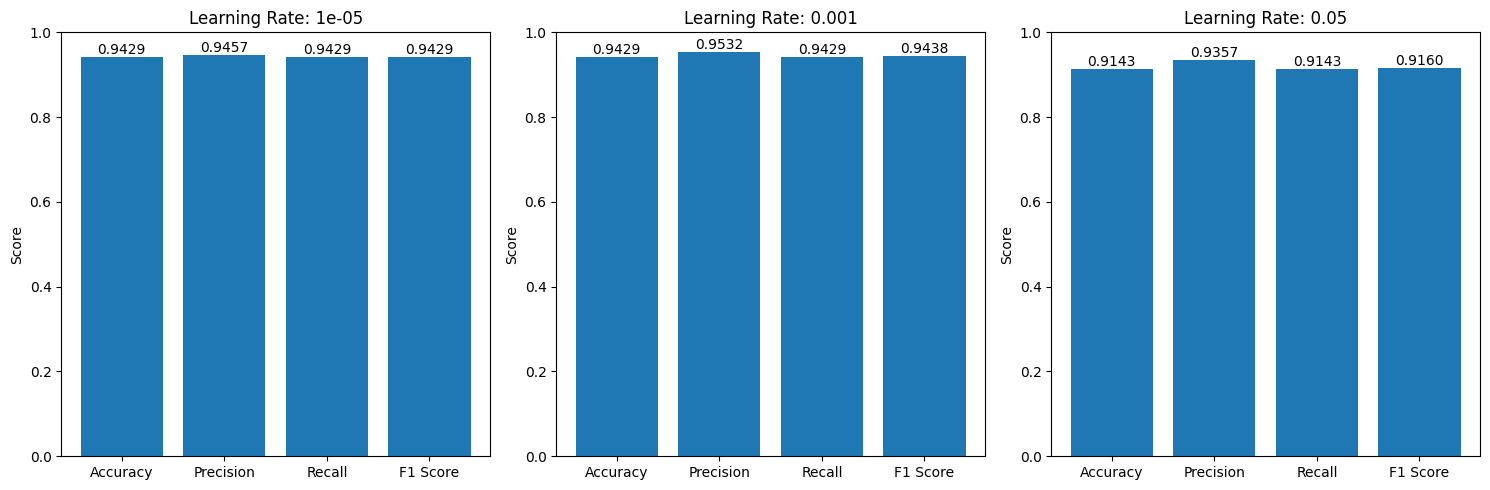

In [ ]:
labels = set(y_test)
total_samples = len(y_test)
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}
learning_rates = [0.00001, 0.001, 0.05]
for i, rate in enumerate(learning_rates):
    logistic = LogisticRegression(learning_rate=rate, max_iters=100000)
    y_pred = logistic.fit(X_train, y_train).predict(X_test)
    print(f"Learning rate {rate}")
    weighted_precision = 0
    weighted_recall = 0
    weighted_f1_score = 0
    for label in labels:
        p = precision(y_test, y_pred, label)
        r = recall(y_test, y_pred, label)
        f1 = f1_score(y_test, y_pred, label)
        class_size = sum(1 for y in y_test if y == label)
        weighted_precision += (p* class_size) / total_samples
        weighted_recall += (r * class_size) / total_samples
        weighted_f1_score += (f1* class_size) / total_samples
    metrics['Accuracy'].append(accuracy(y_test, y_pred))
    metrics['Precision'].append(weighted_precision)
    metrics['Recall'].append(weighted_recall)
    metrics['F1 Score'].append(weighted_f1_score)

    print("Accuracy: ", accuracy(y_test, y_pred))
    print("Precision: ", weighted_precision)
    print("Recall: ", weighted_recall)
    print("F1 Score: ", weighted_f1_score)
    # Plot the learning rate against the loss
fig, axs = plt.subplots(1, len(learning_rates), figsize=(15, 5))
for i, rate in enumerate(learning_rates):
    bars = axs[i].bar(metrics.keys(), [metrics[key][i] for key in metrics])
    axs[i].set_title(f'Learning Rate: {rate}')
    axs[i].set_ylim(0, 1)  # Set y-axis limit to ensure consistent scale
    axs[i].set_ylabel('Score')

    # Add numeric values above each bar
    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, height,
                    f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Experiemnt 6 - GridSearch - Linear

LR=1e-07, Eps=1e-08, Epoch=10
mse=141.22470058256562
LR=1e-07, Eps=1e-08, Epoch=20
mse=136.13395628197543
LR=1e-07, Eps=1e-08, Epoch=3
mse=157.77498405031434
LR=1e-07, Eps=1e-06, Epoch=10
mse=142.91000052379525
LR=1e-07, Eps=1e-06, Epoch=20
mse=133.09273632456512
LR=1e-07, Eps=1e-06, Epoch=3
mse=166.93955975420215
LR=1e-07, Eps=0.0001, Epoch=10
mse=155.008276039001
LR=1e-07, Eps=0.0001, Epoch=20
mse=141.92302378769887
LR=1e-07, Eps=0.0001, Epoch=3
mse=159.07736234842247
LR=1e-05, Eps=1e-08, Epoch=10
mse=3.0586309373587963e+31
LR=1e-05, Eps=1e-08, Epoch=20
mse=1.1269207535333645e+48
LR=1e-05, Eps=1e-08, Epoch=3
mse=27075584978.590683
LR=1e-05, Eps=1e-06, Epoch=10
mse=1.9147768054910267e+21
LR=1e-05, Eps=1e-06, Epoch=20
mse=6.53264803362247e+61
LR=1e-05, Eps=1e-06, Epoch=3
mse=5949382473.504325
LR=1e-05, Eps=0.0001, Epoch=10
mse=276301211516467.94
LR=1e-05, Eps=0.0001, Epoch=20
mse=3.1128065220039257e+38
LR=1e-05, Eps=0.0001, Epoch=3
mse=1509563.248479621
LR=0.001, Eps=1e-08, Epoch=10
ms

<ipython-input-11-bc86e40e0558>:65: RuntimeWarning: invalid value encountered in subtract
  self.w -= delta_w


mse=nan
LR=0.001, Eps=1e-08, Epoch=3
mse=nan
LR=0.001, Eps=1e-06, Epoch=10
mse=nan
LR=0.001, Eps=1e-06, Epoch=20
mse=nan
LR=0.001, Eps=1e-06, Epoch=3
mse=nan
LR=0.001, Eps=0.0001, Epoch=10
mse=nan
LR=0.001, Eps=0.0001, Epoch=20
mse=nan
LR=0.001, Eps=0.0001, Epoch=3
mse=nan


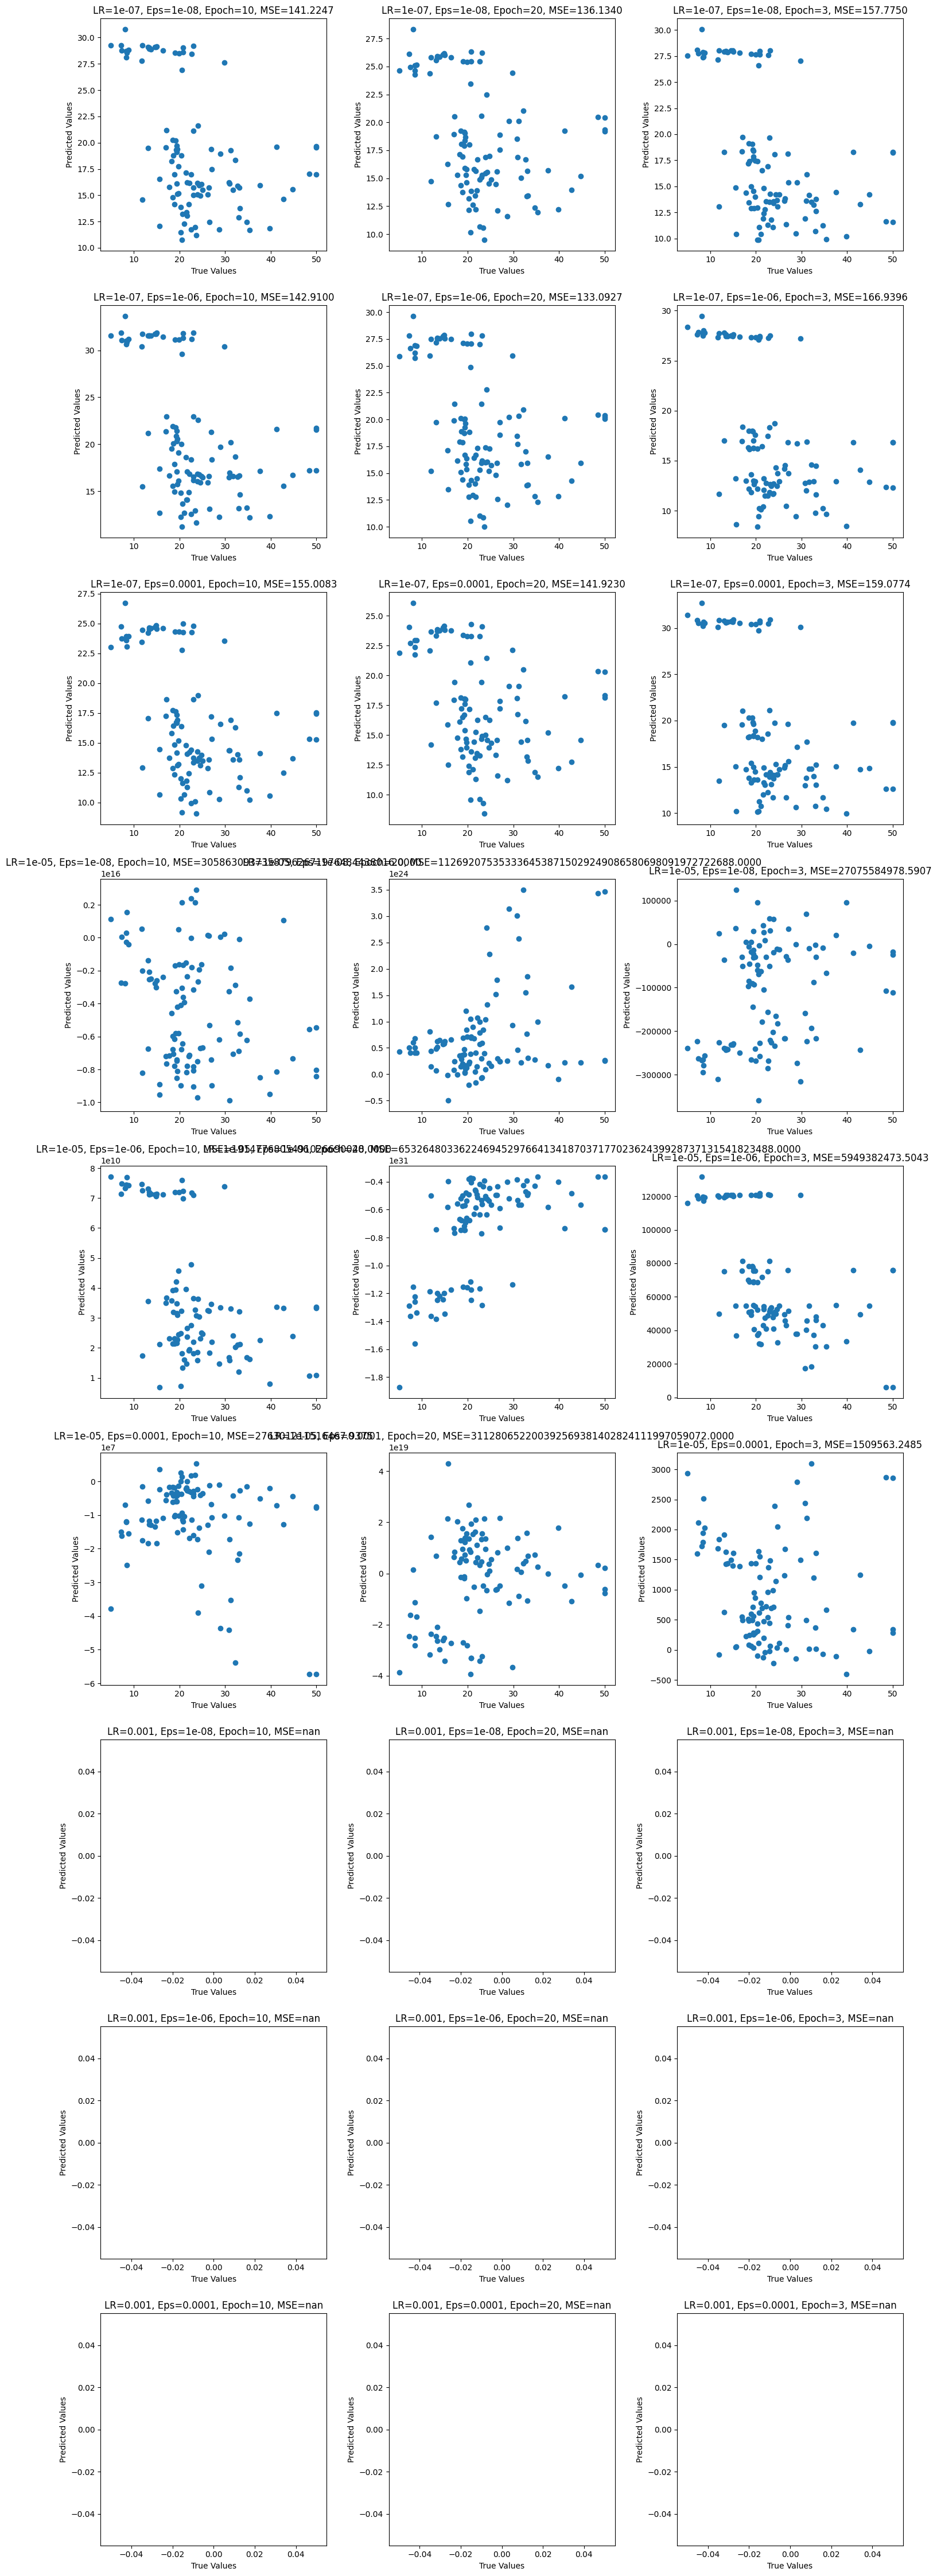

In [ ]:
learning_rate_values = [1e10, 0.00001, 0.001]
epsilon_values = [1e-8, 1e-6, 1e-4]
epoch_values = [10, 20, 3]

num_combinations = len(learning_rate_values) * len(epsilon_values) * len(epoch_values)
num_rows = (num_combinations + 2) // 3  # Ensure there are 3 subplots in each row

fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
subplot_row = 0
subplot_col = 0
# Create a figure with 3 columns and 9 rows
#fig, axs = plt.subplots(9, 3, figsize=(15, 20))

# Loop through all combinations of hyperparameters
for learning_rate in learning_rate_values:
    for epsilon in epsilon_values:
        for epoch in epoch_values:
            # Create and train the model
            print(f"LR={learning_rate}, Eps={epsilon}, Epoch={epoch}")
            linear_model = miniBatch(learning_rate=learning_rate, epsilon=epsilon, epoch=epoch, model_type="linear")
            linear_model.fit(X_boston_train, y_boston_train, 1)

            # Predict using the trained model
            yh_linear = linear_model.predict(X_boston_test, weights=linear_model.w)

            # Calculate the mean squared error
            mse = np.mean((yh_linear - y_boston_test) ** 2)
            print(f"mse={mse}")
            # Plot the MSE as a title for the subplot
            axs[subplot_row, subplot_col].scatter(y_boston_test, yh_linear)
            axs[subplot_row, subplot_col].set_xlabel('True Values')
            axs[subplot_row, subplot_col].set_ylabel('Predicted Values')
            axs[subplot_row, subplot_col].set_title(f"LR={learning_rate}, Eps={epsilon}, Epoch={epoch}, MSE={mse:.4f}")
            subplot_col += 1
            if subplot_col == 3:
                subplot_col = 0
                subplot_row += 1
# Adjust layout and spacing
plt.tight_layout()
plt.show()

In [ ]:
# Experiemnt 6 - GridSearch - Logistic

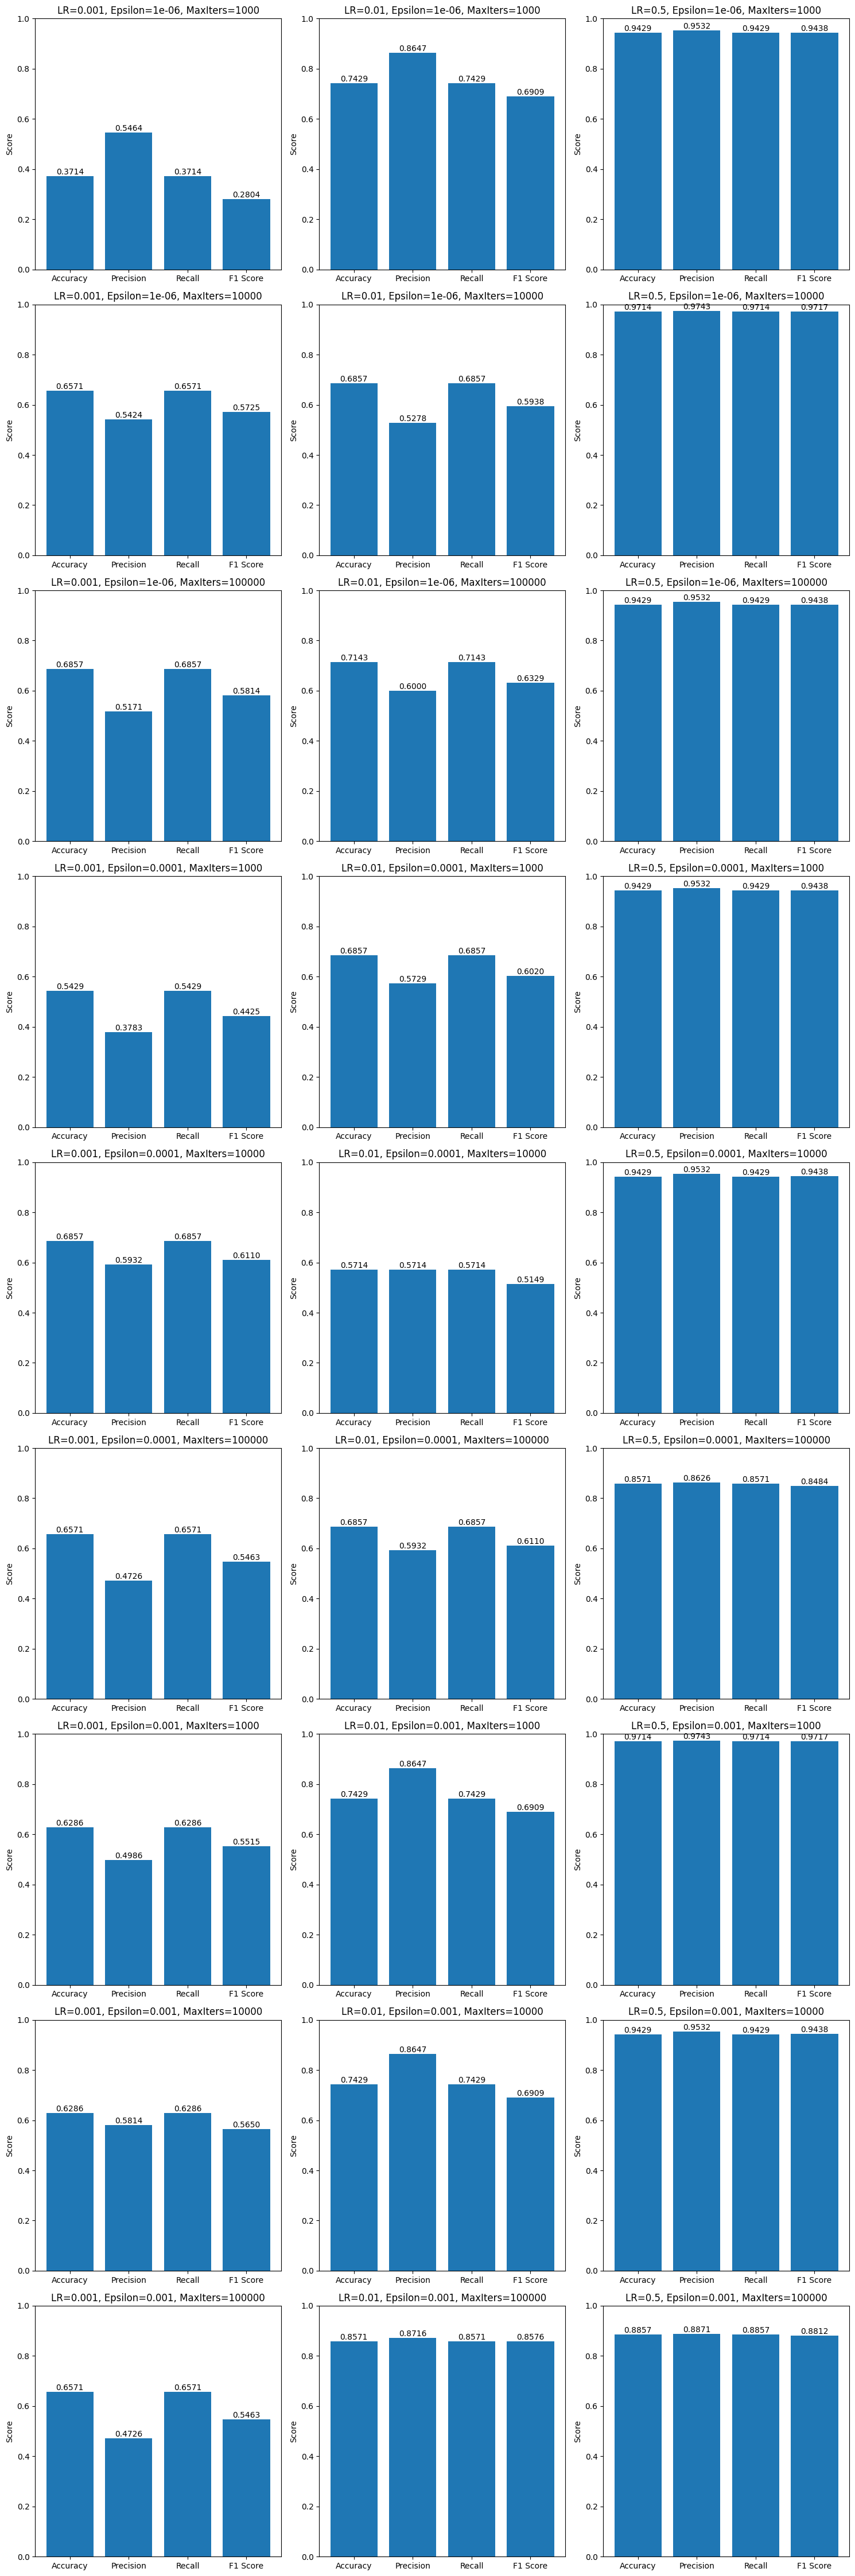

In [ ]:
import matplotlib.pyplot as plt

# Define the range of values for each hyperparameter
learning_rate_values = [0.001, 0.01, 0.5]
epsilon_values = [1e-6, 1e-4, 1e-3]
max_iters_values = [1000, 10000, 100000]

# Initialize lists to store evaluation metrics for each combination
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through all combinations of hyperparameters
for learning_rate in learning_rate_values:
    for epsilon in epsilon_values:
        for max_iters in max_iters_values:

            # Initialize the logistic regression model with current hyperparameters
            logistic = LogisticRegression(learning_rate=learning_rate, epsilon=epsilon, max_iters=max_iters)

            # Train the model on your dataset (replace with your data)
            y_pred = logistic.fit(X_train, y_train).predict(X_test)

            # Calculate evaluation metrics
            a = accuracy(y_test, y_pred)
            weighted_precision = 0
            weighted_recall = 0
            weighted_f1_score = 0
            for label in labels:
                p = precision(y_test, y_pred, label)
                r = recall(y_test, y_pred, label)
                f1 = f1_score(y_test, y_pred, label)
                class_size = sum(1 for y in y_test if y == label)
                weighted_precision += (p* class_size) / total_samples
                weighted_recall += (r * class_size) / total_samples
                weighted_f1_score += (f1* class_size) / total_samples

            # Calculate evaluation metrics

            # Append metrics to respective lists
            accuracy_scores.append(a)
            precision_scores.append(weighted_precision)
            recall_scores.append(weighted_recall)
            f1_scores.append(weighted_f1_score)

# Calculate the number of rows needed for subplots
num_combinations = len(learning_rate_values) * len(epsilon_values) * len(max_iters_values)
num_rows = (num_combinations + 2) // 3  # Ensure there are 3 subplots in each row

# Create subplots with 3 columns in each row
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Initialize index to keep track of subplot rows and columns
subplot_row = 0
subplot_col = 0

for i in range(num_combinations):
    metrics = {
        'Accuracy': accuracy_scores[i],
        'Precision': precision_scores[i],
        'Recall': recall_scores[i],
        'F1 Score': f1_scores[i]
    }

    bars = axs[subplot_row, subplot_col].bar(metrics.keys(), [metrics[key] for key in metrics])
    axs[subplot_row, subplot_col].set_title(f'LR={learning_rate_values[i%3]}, Epsilon={epsilon_values[i//9]}, MaxIters={max_iters_values[(i//3)%3]}')
    axs[subplot_row, subplot_col].set_ylim(0, 1)  # Set y-axis limit to ensure consistent scale
    axs[subplot_row, subplot_col].set_ylabel('Score')

    # Add numeric values above each bar
    for bar in bars:
        height = bar.get_height()
        axs[subplot_row, subplot_col].text(bar.get_x() + bar.get_width() / 2, height,
                                    f'{height:.4f}', ha='center', va='bottom')

    # Increment the subplot column and row
    subplot_col += 1
    if subplot_col == 3:
        subplot_col = 0
        subplot_row += 1

# Remove empty subplots if needed
while subplot_row < num_rows:
    for col in range(3):
        axs[subplot_row, col].axis('off')
    subplot_row += 1

plt.tight_layout()
plt.show()


# Analytical vs Mini Batch

In [ ]:
# Part 4 Mini Batch Testing
import time
# Split data into 80/20 training and testing

def normalize(x):
  return (x-np.min(x))/(np.max(x)-np.min(x))

def train_test_split(x, y, test_size):
    num_instances = x.shape[0]
    n_test = int(num_instances * test_size)
    inds = np.random.permutation(num_instances)
    x_test, y_test = x[inds[:n_test]], y[inds[:n_test]] # takes the test size of the database
    x_train, y_train = x[inds[n_test:]], y[inds[n_test:]] # the rest of data goes to the training set
    return x_train, y_train, x_test, y_test
test_size = .2
X_train_boston, y_train_boston, x_test_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size)

# Test different sizes of mini batches
MB_model = miniBatch(model_type="linear")
analytical_model = LinearRegression()

# Analytical
analytical_time_start = time.time()
analytical_model.fit(X_train_boston, y_train_boston)
analytical_time_end = time.time()
analytical_time = analytical_time_end - analytical_time_start
yh_analytical = analytical_model.predict(x_test_boston)
MSE_analytical = MSE_loss(y_test_boston, yh_analytical)

# Minibatch size = 8
MB_time_start = time.time()
MB_model.fit(X_train_boston, y_train_boston, 8)
MB_time_end = time.time()
MB_time = MB_time_end - MB_time_start
yh_MB = MB_model.predict(x_test_boston, MB_model.w)
MSE_MB = MSE_loss(y_test_boston, yh_MB)

# MiniBatch size = 256
MB_time_start_2 = time.time()
MB_model.fit(X_train_boston, y_train_boston, 256)
MB_time_end_2 = time.time()
MB_time_2 = MB_time_end_2 - MB_time_start_2
yh_MB_2 = MB_model.predict(x_test_boston, MB_model.w)
MSE_MB_2 = MSE_loss(y_test_boston, yh_MB_2)

print("Analytical Solution: \n")
print("Convergence Time:  ", analytical_time)
print("MSE: ", MSE_analytical)
print("\n Mini Batch Size = 8 Solution: \n")
print("Convergence Time:  ", MB_time)
print("MSE: ", MSE_MB)
print("\n Mini Batch Size = 256 Solution: \n")
print("Convergence Time:  ", MB_time_2)
print("MSE: ", MSE_MB_2)